In [95]:
import numpy as np
import pandas as pd
#from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
#from sklearn import preprocessing
from sklearn import tree
#%matplotlib inline

In [96]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [97]:
# Le dados originais
df = pd.read_csv('tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [98]:
# Converte para dados numéricos 

df.loc[df['outlook'] == 'sunny', 'outlook'] = 1
df.loc[df['outlook'] == 'overcast', 'outlook'] = 2
df.loc[df['outlook'] == 'rainy', 'outlook'] = 3

df.loc[df['temp'] == 'hot', 'temp'] = 30
df.loc[df['temp'] == 'mild', 'temp'] = 20
df.loc[df['temp'] == 'cool', 'temp'] = 10

df.loc[df['humidity'] == 'high', 'humidity'] = True
df.loc[df['humidity'] == 'normal', 'humidity'] = False

df.loc[df['play'] == 'no', 'play'] = False
df.loc[df['play'] == 'yes', 'play'] = True
df


,outlook,temp,humidity,windy,play
0,1,30,True,False,False
1,1,30,True,True,False
2,2,30,True,False,True
3,3,20,True,False,True
4,3,10,False,False,True
5,3,10,False,True,False
6,2,10,False,True,True
7,1,20,True,False,False
8,1,10,False,False,True
9,3,20,False,False,True


In [99]:
# Separa a coluna de dados da coluna 'Classe'
X_train = df.loc[:, df.columns != 'play']
X_train


,outlook,temp,humidity,windy
0,1,30,True,False
1,1,30,True,True
2,2,30,True,False
3,3,20,True,False
4,3,10,False,False
5,3,10,False,True
6,2,10,False,True
7,1,20,True,False
8,1,10,False,False
9,3,20,False,False


In [100]:
Y_train = df.play
Y_train

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13    False
Name: play, dtype: bool

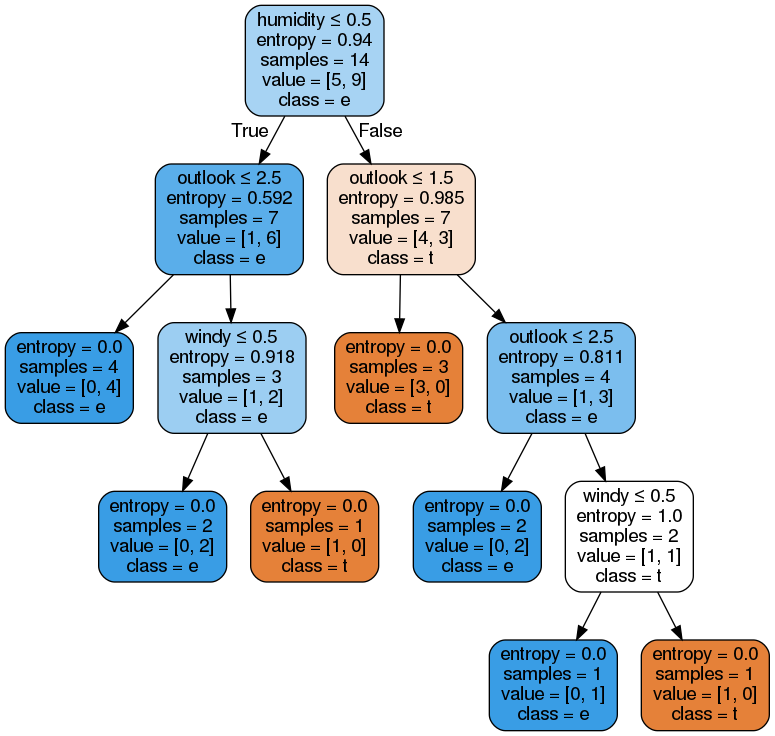

In [101]:
# Entropia
clf_por_entropia = tree.DecisionTreeClassifier(criterion='entropy')
clf_por_entropia = clf_por_entropia.fit(X_train,Y_train)
plot_decision_tree(clf_por_entropia, X_train.columns,df.columns[1])

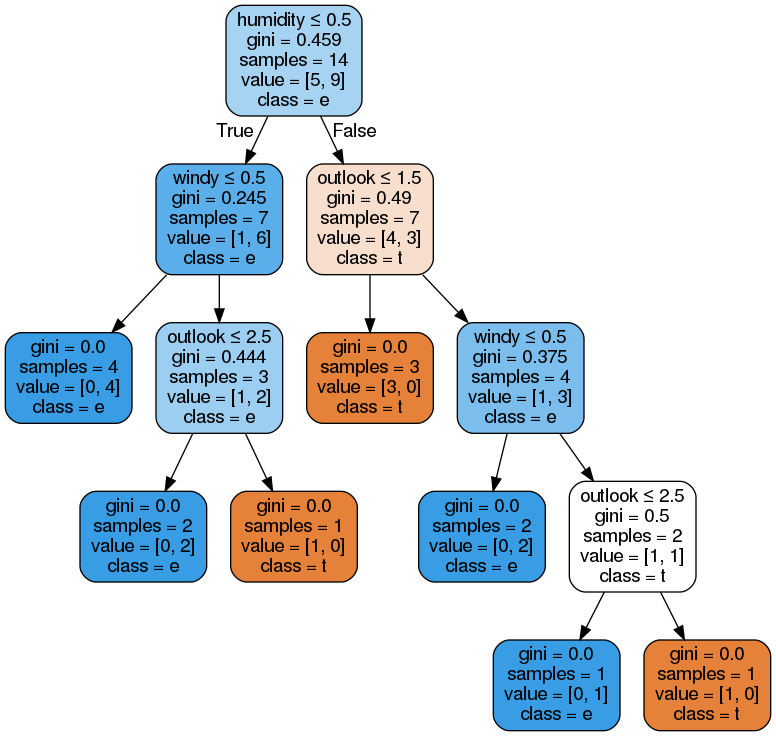

In [102]:
# GINI
clf_por_gini = tree.DecisionTreeClassifier()
clf_por_gini = clf_por_gini.fit(X_train,Y_train)
plot_decision_tree(clf_por_gini, X_train.columns,df.columns[1])

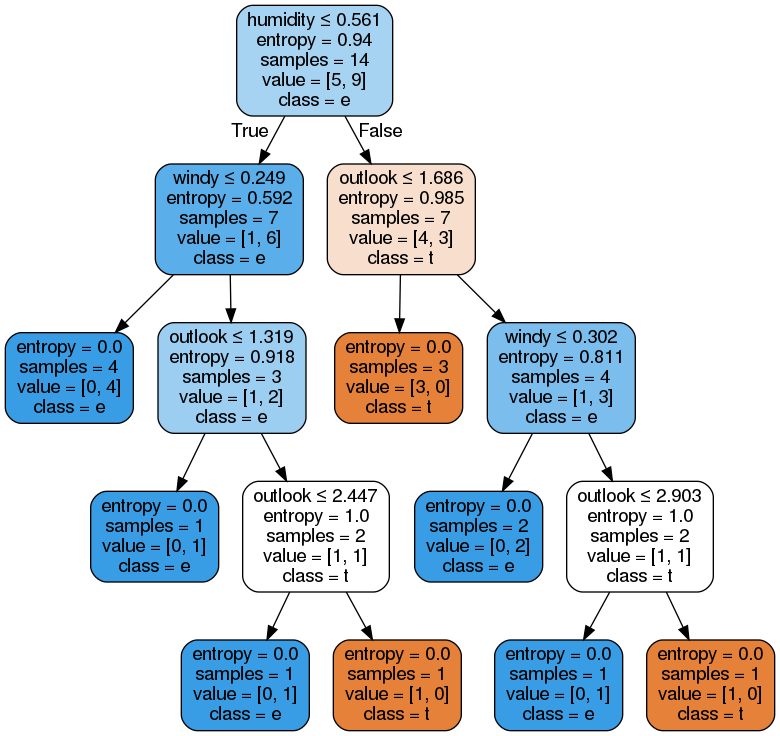

In [103]:
# splitter random (default = best)
clf_por_entropia = tree.DecisionTreeClassifier(criterion='entropy', splitter='random')
clf_por_entropia = clf_por_entropia.fit(X_train,Y_train)
plot_decision_tree(clf_por_entropia, X_train.columns,df.columns[1])

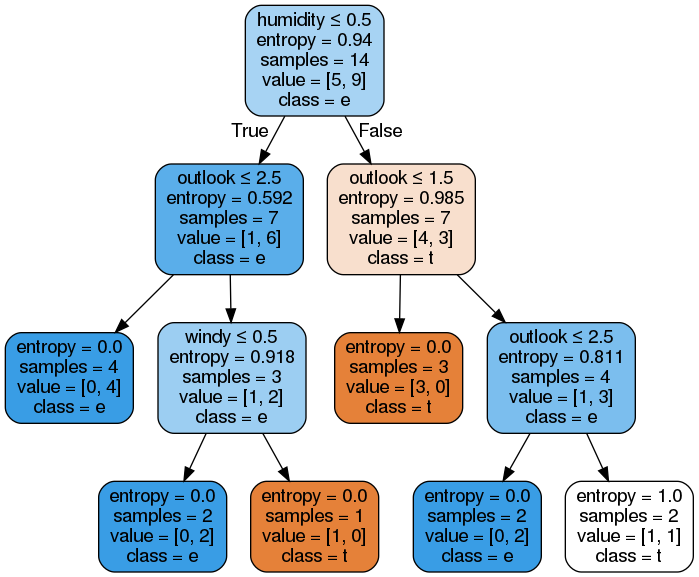

In [105]:
# outros parametros:
# max_depth, min_samples_split
clf_por_entropia = tree.DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=3,  # default 2
    min_samples_leaf=1,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0,
    class_weight=None,
    presort=False)

clf_por_entropia = clf_por_entropia.fit(X_train,Y_train)
plot_decision_tree(clf_por_entropia, X_train.columns,df.columns[1])